Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type


* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
#Raw data of city csv
filepath = os.path.join("raw_data/city_data.csv")
city_raw_df=pd.read_csv(filepath, low_memory="false")
city_raw_df.sort_values("city").tail()

,city,driver_count,type
67,Williamchester,26,Suburban
25,Williamshire,70,Urban
32,Wiseborough,55,Urban
20,Yolandafurt,7,Urban
58,Zimmermanmouth,45,Urban


In [6]:
#raw data of ride csv
filepath2 = os.path.join("raw_data/ride_data.csv")
ride_raw_df=pd.read_csv(filepath2, low_memory="false")
ride_raw_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
#x_axis = total number of rides per city
rides_per_city = ride_raw_df.groupby("city")[["date"]].count()
rides_per_city.head()

,date
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [8]:
#y_axis = average fare per city
fare_per_city = ride_raw_df.groupby("city")[["fare"]].mean()
fare_per_city.head()

,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [34]:
# size of bubble = total number of drivers per city
#size = city_raw_df[["city","driver_count"]]
#size
#size

size=city_raw_df.groupby("city")[["driver_count"]].mean()
size.head()

,driver_count
city,
Alvarezhaven,21
Alyssaberg,67
Anitamouth,16
Antoniomouth,21
Aprilchester,49


In [32]:
#Complete Df of color of bubble = type of city
type_city = city_raw_df[["city","type"]].drop_duplicates()
type_city.head()

color = for x in type_city["type"]

,city,type
0,Kelseyland,Urban
1,Nguyenbury,Urban
2,East Douglas,Urban
3,West Dawnfurt,Urban
4,Rodriguezburgh,Urban


In [24]:
#type_cit broken down by type = urban
urban = type_city.loc[type_city["type"]== "Urban"]
urban.head()





,city,type
0,Kelseyland,Urban
1,Nguyenbury,Urban
2,East Douglas,Urban
3,West Dawnfurt,Urban
4,Rodriguezburgh,Urban


In [25]:
#type_cit broken down by type = rural
rural = type_city.loc[type_city["type"]== "Rural"]
rural.head()



,city,type
108,South Elizabethmouth,Rural
109,East Troybury,Rural
110,Kinghaven,Rural
111,New Johnbury,Rural
112,Erikport,Rural


In [33]:
#type_cit broken down by type = suburban
suburban = type_city.loc[type_city["type"]== "Suburban"]
suburban.head()

,city,type
66,Carrollbury,Suburban
67,Williamchester,Suburban
68,New Michelleberg,Suburban
69,West Evan,Suburban
70,South Gracechester,Suburban


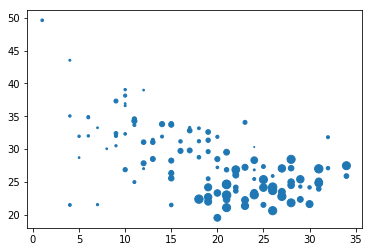

In [35]:
plt.scatter(rides_per_city["date"], fare_per_city["fare"], s=size["driver_count"])
plt.show()

In [ ]:
plt.scatter(rides_per_city, fare_per_city)
plt.show()

In [ ]:
#tick marks x axis
x_axis = np.arange(0,rides_per_city["date"].max() + 10,5)
x_axis

In [ ]:
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Pyber Ride Sharing Data (2016)"")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Print our chart to the screen
plt.show()